# Project on :- Air quality Index Prediction

# Team 2

* Ankit Lakra   MA22M002
* Prince        MA22M012
* Sourav Jana   MA22M022
* Rohan Jaiswal MA22M026

* Importing Pandas from library , it is use read csv file.

In [34]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [35]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset


In [36]:
df = pd.read_csv('mumbai_1.csv')

In [37]:
 df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,25-06-2019,12.5700,43.8300,8.0100,9.4900,None,25.0100,4.9400
1,26-06-2019,9.1600,34.1100,3.1600,9.5100,0.3600,30.5100,6.8200
2,27-06-2019,6.7100,29.4400,None,9.4200,0.2200,26.7500,None
3,28-06-2019,2.9000,18.6100,3.3200,9.4900,0.1800,26.2600,5.9800
4,29-06-2019,4.0800,28.5600,4.0300,9.5200,0.0300,30.3000,2.5000
...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.3000,183.1700,None,30.5700,1.4600,11.1200,28.1700
1336,20-02-2023,88.3000,194.4800,None,28.6000,1.5500,11.2800,27.0800
1337,21-02-2023,72.4300,128.2200,None,26.2700,1.3800,11.0900,29.0500
1338,22-02-2023,84.9400,159.5100,None,26.0800,1.4300,10.4100,25.9000


 In pandas "None" is not treated as missing value. So, we just converted the "None" value to "NaN" value.

In [38]:
missing_value=["None"]
df=pd.read_csv('mumbai_1.csv',na_values=missing_value)

In [39]:
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,25-06-2019,12.57,43.83,8.01,9.49,NaN,25.01,4.94
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82
2,27-06-2019,6.71,29.44,NaN,9.42,0.22,26.75,NaN
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50
...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,NaN,30.57,1.46,11.12,28.17
1336,20-02-2023,88.30,194.48,NaN,28.60,1.55,11.28,27.08
1337,21-02-2023,72.43,128.22,NaN,26.27,1.38,11.09,29.05
1338,22-02-2023,84.94,159.51,NaN,26.08,1.43,10.41,25.90


 Now we can see the statistical description of data frame

In [40]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
count,1149.000000,1230.000000,1231.000000,1216.000000,1250.000000,1242.000000,1240.000000
mean,39.379060,83.627626,24.496686,17.716505,0.709848,14.549823,15.012476
std,29.112165,57.602031,28.833937,17.600163,0.491962,18.679601,11.656167
min,2.500000,11.840000,0.380000,0.010000,0.000000,0.010000,0.340000
25%,14.510000,35.762500,7.510000,6.857500,0.350000,2.380000,8.325000
50%,30.720000,66.180000,11.570000,14.015000,0.640000,7.030000,11.830000
75%,60.200000,126.287500,33.490000,22.147500,1.020000,16.547500,17.497500
max,272.760000,543.830000,229.200000,180.100000,3.110000,116.780000,131.750000


 Now we can see the statistical description of data frame

In [41]:
df.isnull().sum()

 Date      0
PM2.5    191
PM10     110
NO2      109
SO2      124
CO        90
Ozone     98
NH3      100
dtype: int64

# Here we can see that there are missing values 

checking information df has... according to the dtype and total count

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    Date   1340 non-null   object 
 1   PM2.5   1149 non-null   float64
 2   PM10    1230 non-null   float64
 3   NO2     1231 non-null   float64
 4   SO2     1216 non-null   float64
 5   CO      1250 non-null   float64
 6   Ozone   1242 non-null   float64
 7   NH3     1240 non-null   float64
dtypes: float64(7), object(1)
memory usage: 83.9+ KB


In [43]:
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.


# Plotting 

Plotting of PM 2.5

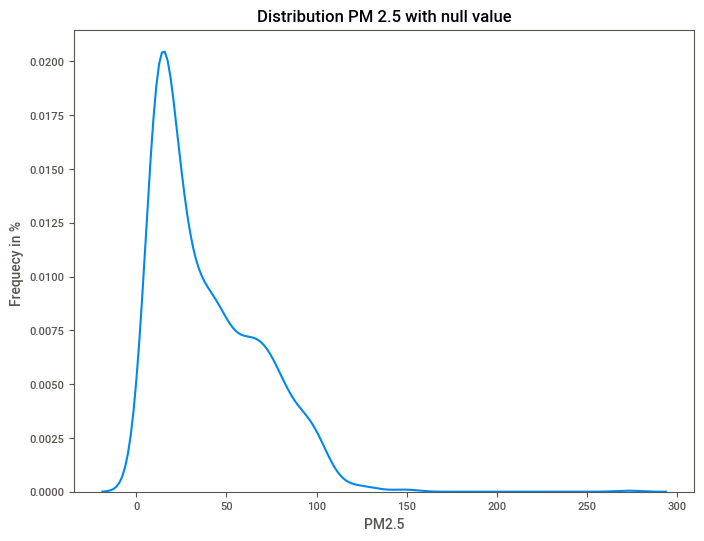

In [44]:
# plotting the distribution graph of PM2.5
%matplotlib inline
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='PM2.5')
plt.title("Distribution PM 2.5 with null value")
plt.ylabel("Frequecy in % ")
plt.show()

* After getting information from the distribution plot,we decided nan value repace with mean value of the column 

In [45]:
# so here we are taking the mean
pmmean=df["PM2.5"].mean()
pmmean

39.37906005221933

In [46]:
# we are replacing the NaN with mean
df["PM2.5"].fillna(pmmean,inplace=True)
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,25-06-2019,12.57,43.83,8.01,9.49,NaN,25.01,4.94
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82
2,27-06-2019,6.71,29.44,NaN,9.42,0.22,26.75,NaN
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50
...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,NaN,30.57,1.46,11.12,28.17
1336,20-02-2023,88.30,194.48,NaN,28.60,1.55,11.28,27.08
1337,21-02-2023,72.43,128.22,NaN,26.27,1.38,11.09,29.05
1338,22-02-2023,84.94,159.51,NaN,26.08,1.43,10.41,25.90


Text(0.5, 1.0, 'Distribution PM 2.5 with null value replaced by mean')

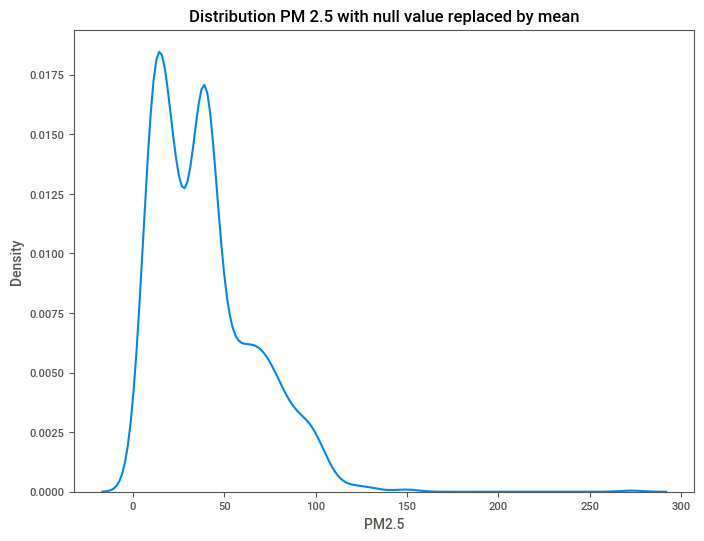

In [47]:
# Again plotting the distribution graph
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='PM2.5')
plt.title("Distribution PM 2.5 with null value replaced by mean")

* Now checking distributio of the PM10

plotting the distribution graph  of PM10

Text(0.5, 1.0, 'Distribution PM 10 with null value')

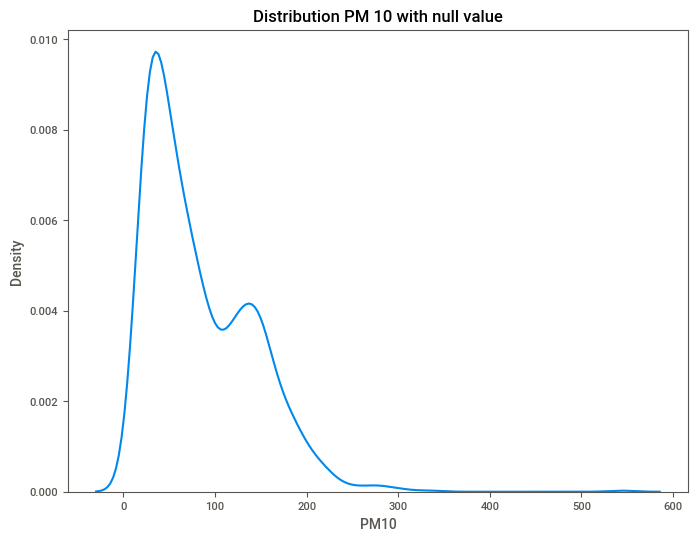

In [48]:

plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='PM10')
plt.title("Distribution PM 10 with null value")

In [49]:
pm_mean=df["PM10"].mean()
pm_mean

83.62762601626017

In [50]:
df["PM10"].fillna(pm_mean,inplace=True)

Text(0.5, 1.0, 'Distribution PM 10 with null value replaced by mean')

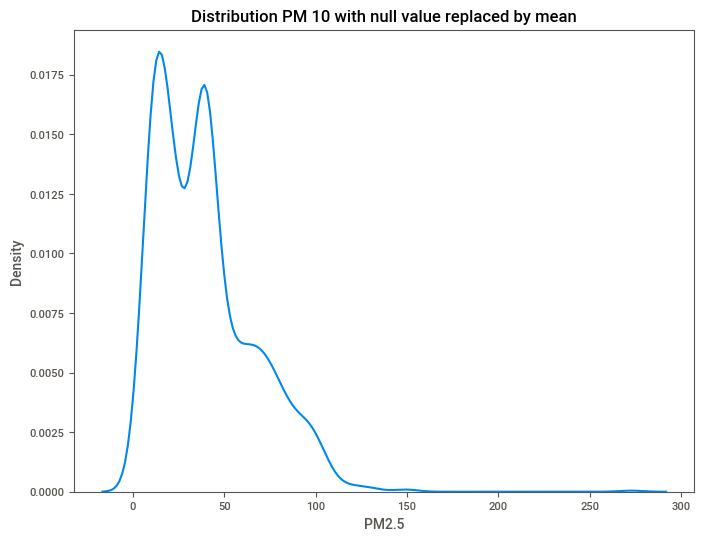

In [51]:
#  Aftrer that plotting the distribution graph
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='PM2.5')
plt.title("Distribution PM 10 with null value replaced by mean")

* In above we have separately checked the mean of PM2.5 and PM 10 but Now we are creating a for loop and showing the mean of all the data such as "PM2.5","PM10","NO2","SO2","Ozone","NH3" separately. And replacing the NaN value with the mean value of its own.

* Now we can do same for all the features of this data set  using For loop

In [52]:
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,25-06-2019,12.57,43.83,8.01,9.49,NaN,25.01,4.94
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82
2,27-06-2019,6.71,29.44,NaN,9.42,0.22,26.75,NaN
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50
...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,NaN,30.57,1.46,11.12,28.17
1336,20-02-2023,88.30,194.48,NaN,28.60,1.55,11.28,27.08
1337,21-02-2023,72.43,128.22,NaN,26.27,1.38,11.09,29.05
1338,22-02-2023,84.94,159.51,NaN,26.08,1.43,10.41,25.90


In [53]:
new_data=df.copy()
coloums=["PM2.5","PM10","NO2","SO2","Ozone","NH3","CO"]
for s in coloums:
    mean = np.round(np.mean(new_data[s]), 2)
    new_data[s] = new_data[s].fillna(mean)
    print(f"Missing Value in {s} column fill with {mean}")
          
new_data          

Missing Value in PM2.5 column fill with 39.38
Missing Value in PM10 column fill with 83.63
Missing Value in NO2 column fill with 24.5
Missing Value in SO2 column fill with 17.72
Missing Value in Ozone column fill with 14.55
Missing Value in NH3 column fill with 15.01
Missing Value in CO column fill with 0.71


,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,25-06-2019,12.57,43.83,8.01,9.49,0.71,25.01,4.94
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82
2,27-06-2019,6.71,29.44,24.50,9.42,0.22,26.75,15.01
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50
...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,24.50,30.57,1.46,11.12,28.17
1336,20-02-2023,88.30,194.48,24.50,28.60,1.55,11.28,27.08
1337,21-02-2023,72.43,128.22,24.50,26.27,1.38,11.09,29.05
1338,22-02-2023,84.94,159.51,24.50,26.08,1.43,10.41,25.90


In [54]:
df=new_data.copy()
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3
0,25-06-2019,12.57,43.83,8.01,9.49,0.71,25.01,4.94
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82
2,27-06-2019,6.71,29.44,24.50,9.42,0.22,26.75,15.01
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50
...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,24.50,30.57,1.46,11.12,28.17
1336,20-02-2023,88.30,194.48,24.50,28.60,1.55,11.28,27.08
1337,21-02-2023,72.43,128.22,24.50,26.27,1.38,11.09,29.05
1338,22-02-2023,84.94,159.51,24.50,26.08,1.43,10.41,25.90


* Again checking for the Null value

In [55]:
df.isnull().sum()
# we can see there are no missing values

 Date    0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
Ozone    0
NH3      0
dtype: int64

* We want to create 2 columns namely "Year" and "Month" by extracting data from the Date column.
* Reason is for better visualization of data

In [56]:
df['Year'] = pd.to_datetime(df[' Date']).dt.year
df['Month'] = pd.to_datetime(df[' Date']).dt.month
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month
0,25-06-2019,12.57,43.83,8.01,9.49,0.71,25.01,4.94,2019,6
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82,2019,6
2,27-06-2019,6.71,29.44,24.50,9.42,0.22,26.75,15.01,2019,6
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98,2019,6
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50,2019,6
...,...,...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,24.50,30.57,1.46,11.12,28.17,2023,2
1336,20-02-2023,88.30,194.48,24.50,28.60,1.55,11.28,27.08,2023,2
1337,21-02-2023,72.43,128.22,24.50,26.27,1.38,11.09,29.05,2023,2
1338,22-02-2023,84.94,159.51,24.50,26.08,1.43,10.41,25.90,2023,2


* We want to see the correlation between each and every columns

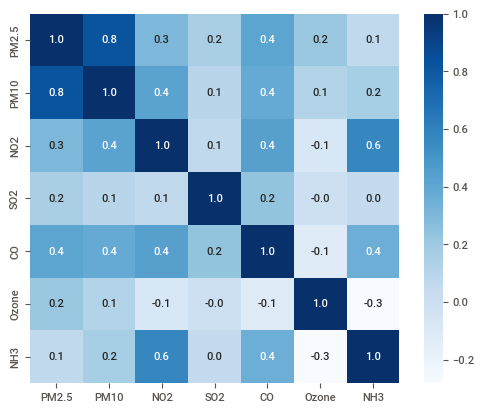

In [57]:
sns.heatmap(df.drop([' Date','Month','Year'], axis=1).corr(),
                annot=True, fmt= '.1f',cmap='Blues',square=True,annot_kws={'size':8})
plt.show()

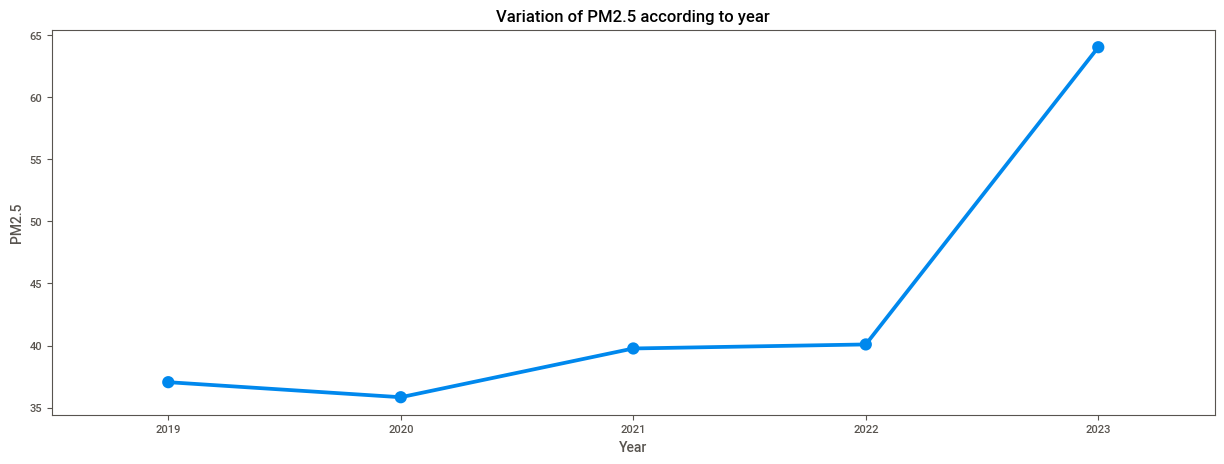

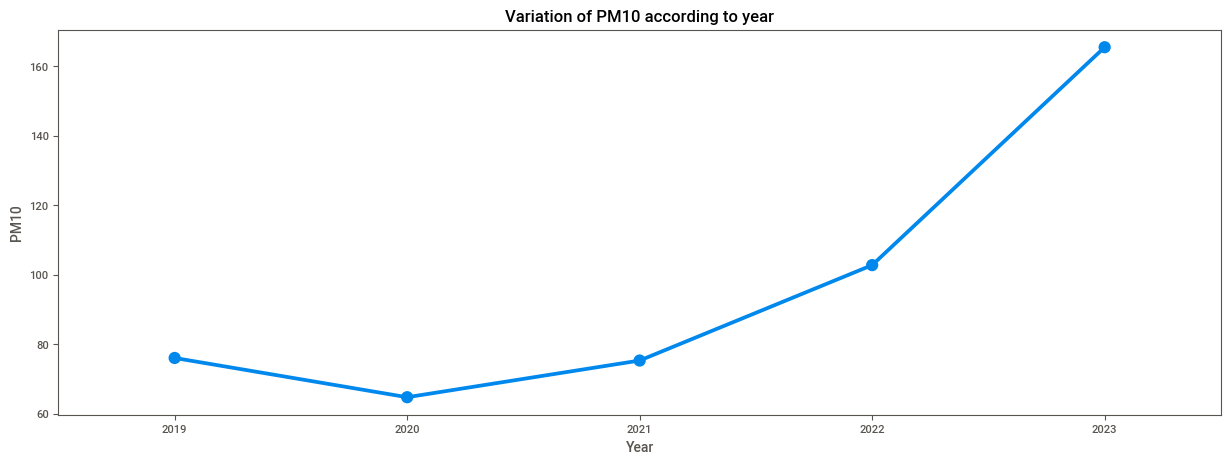

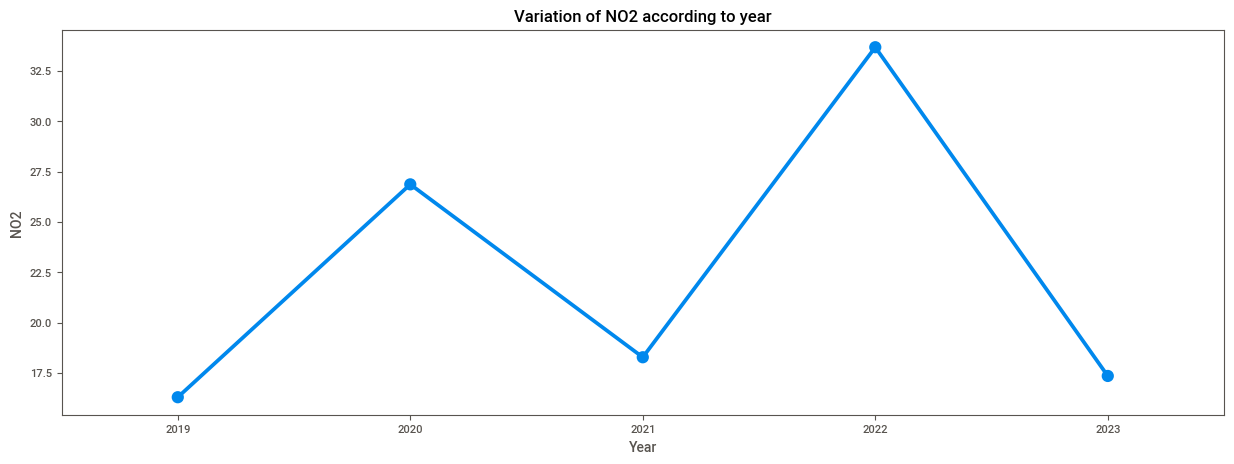

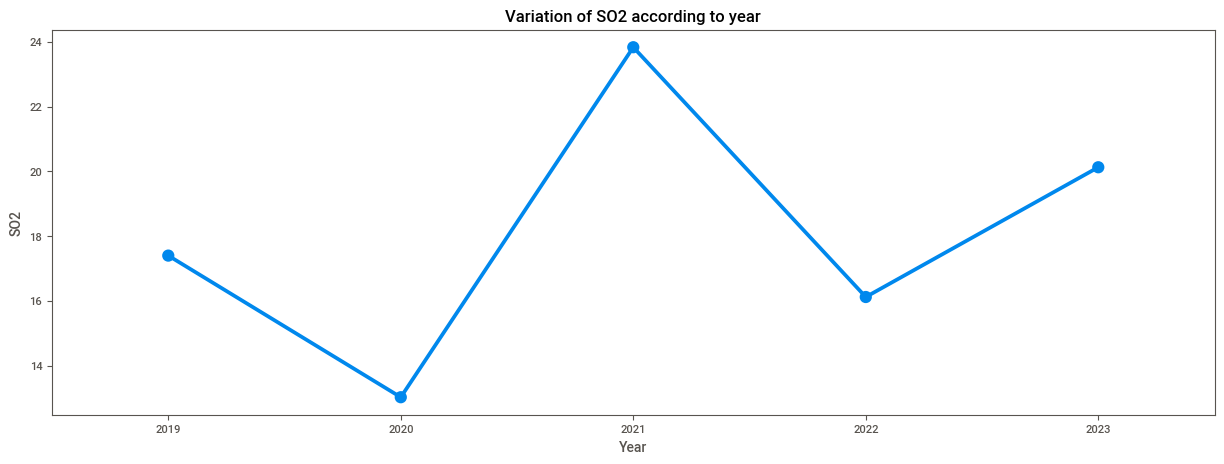

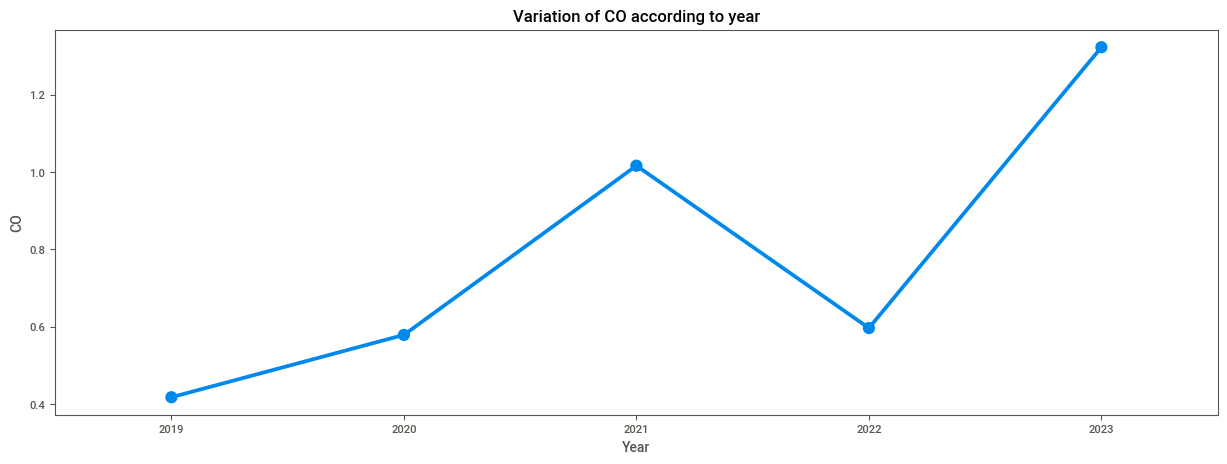

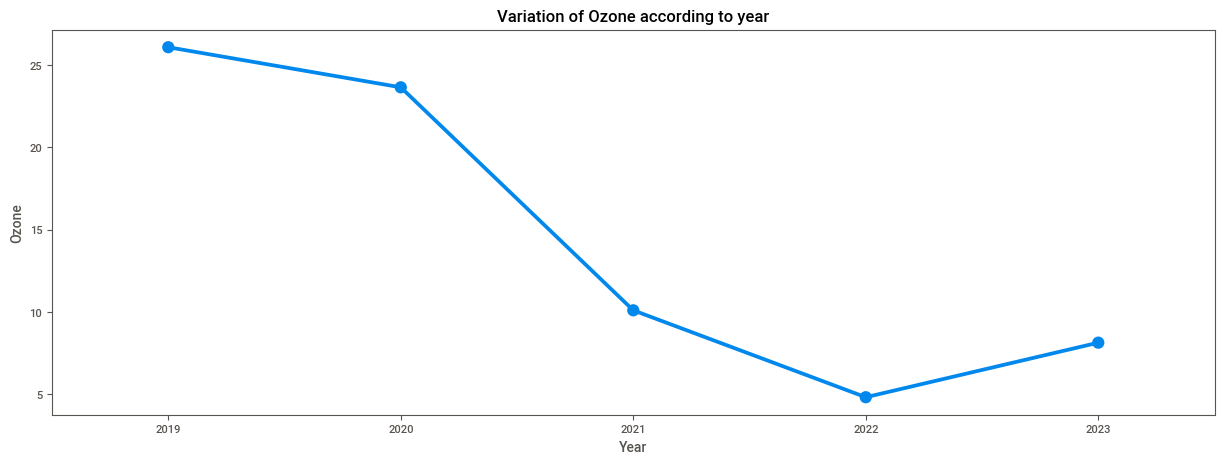

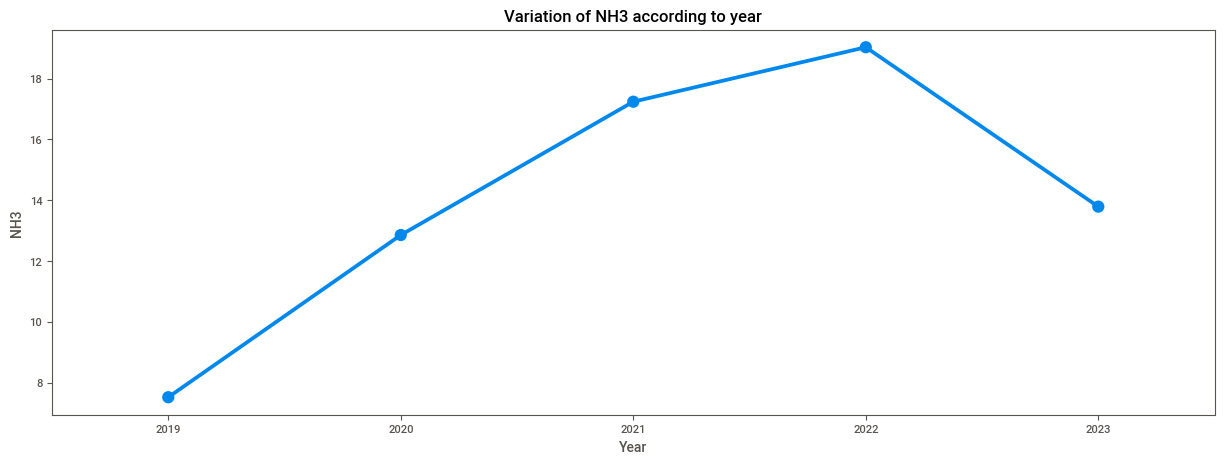

In [58]:
# Now we want to see the variation of each feature according to year
%matplotlib inline
compounds = ["PM2.5","PM10","NO2","SO2","CO","Ozone","NH3"]

for i in compounds:
    data = df[[i,'Year']].groupby(["Year"]).mean().reset_index().sort_values(by='Year', ascending=False)
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=data)
    plt.title(f"Variation of {i} according to year")
    plt.show()


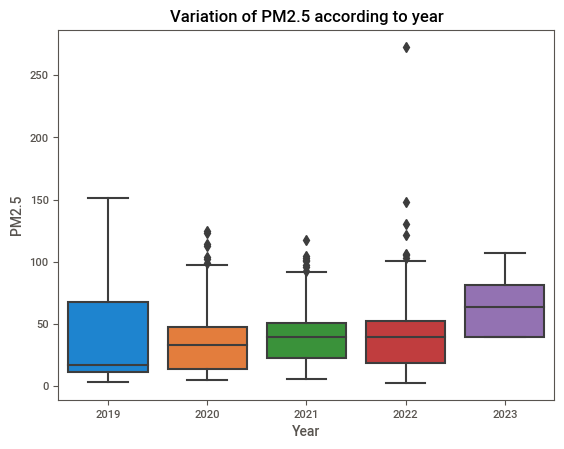

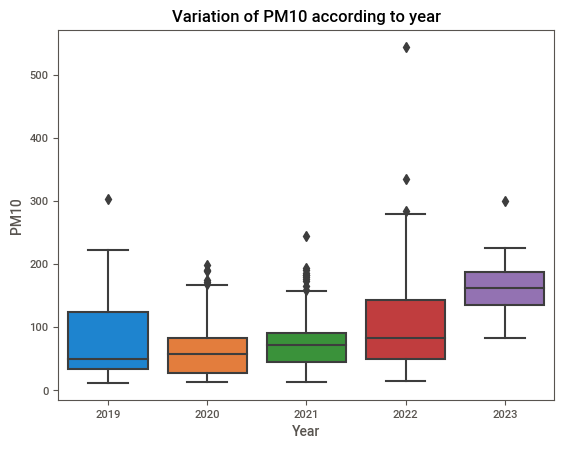

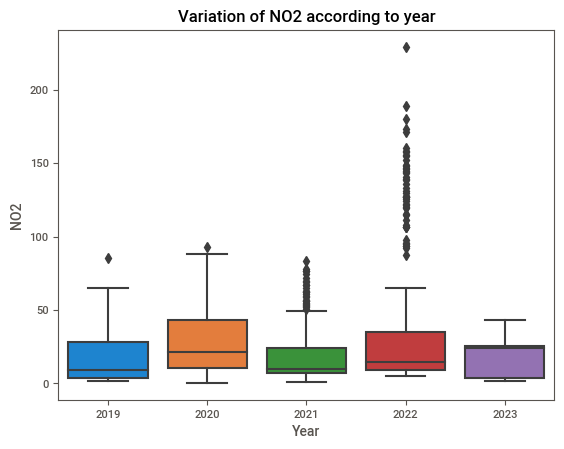

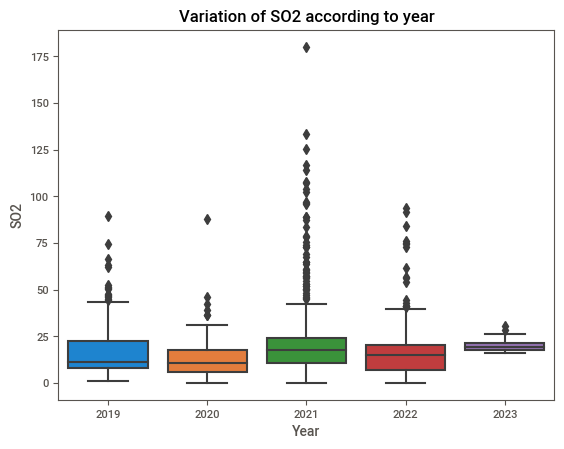

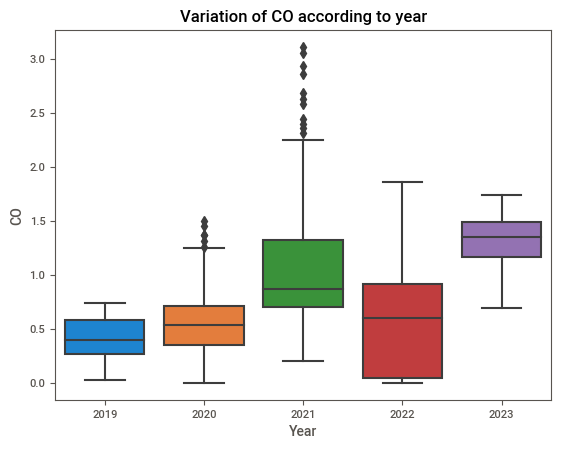

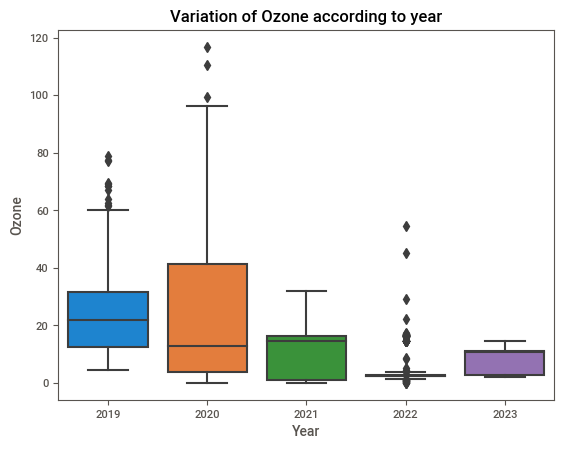

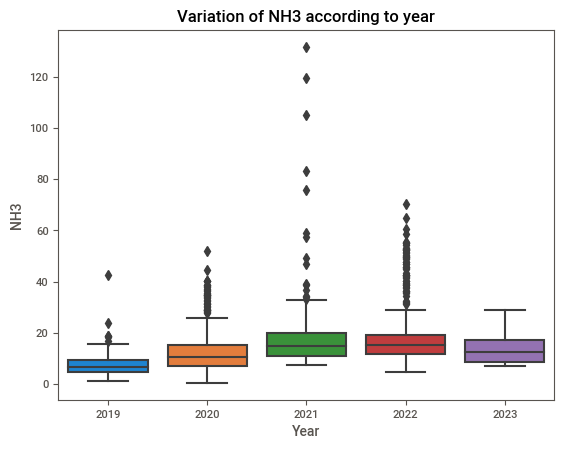

In [59]:
# Now we want to see the BOX plot of each feature according to year. To see outlier
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt

compounds = ["PM2.5","PM10","NO2","SO2","CO","Ozone","NH3"]

for i in compounds:
    data = df[[i,'Year']].groupby(["Year"]).mean().reset_index().sort_values(by='Year', ascending=False)
    #f, ax = plt.subplots(figsize=(15, 5))
    #sns.pointplot(x='Year', y=i, data=data)
    sns.boxplot(x="Year", y=i, data=df)
    plt.title(f"Variation of {i} according to year")
    plt.show()


# We checked the outier effect  of each gases in every year

# Here we caculate the index of SO2 using the standard formula

In [60]:
def cal_SO2_index(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SO2_Index']=df['SO2'].apply(cal_SO2_index)
data= df[['SO2','SO2_Index']]
data.describe()

,SO2,SO2_Index
count,1340.000000,1340.000000
mean,17.716828,21.806841
std,16.765424,19.049167
min,0.010000,0.012500
25%,7.450000,9.312500
50%,15.605000,19.506250
75%,21.000000,26.250000
max,180.100000,133.366667


# Here we caculate the index of NO2 using the standard formula

In [61]:
def cal_No2_index(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['NO2_index']=df['NO2'].apply(cal_No2_index)
data= df[['NO2','NO2_index']]
data.describe()

,NO2,NO2_index
count,1340.000000,1340.000000
mean,24.496955,30.129435
std,27.635429,32.415999
min,0.380000,0.475000
25%,7.785000,9.731250
50%,12.935000,16.168750
75%,31.325000,39.156250
max,229.200000,249.200000


# Here we caculate the index of CO using the standard formula

In [62]:
## CO Sub-Index calculation
def cal_CO_index(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df['CO_index']=df['CO'].apply(cal_CO_index)
data= df[['CO','CO_index']]
data.describe()

,CO,CO_index
count,1340.000000,1340.000000
mean,0.709858,35.260075
std,0.475141,22.890671
min,0.000000,0.000000
25%,0.370000,18.500000
50%,0.670000,33.500000
75%,0.972500,48.625000
max,3.110000,113.875000


# Here we calculate the index of PM2.5 using the standard formula

In [63]:
## PM2.5 Sub-Index calculation
def cal_PM2_5_index(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
df['PM2_5_index']=df['PM2.5'].apply(cal_PM2_5_index)
data= df[['PM2.5','PM2_5_index']]
data.describe()

,PM2.5,PM2_5_index
count,1340.000000,1340.000000
mean,39.379060,72.755856
std,26.955982,59.570448
min,2.500000,4.166667
25%,16.242500,27.070833
50%,39.359530,65.599217
75%,53.405000,89.008333
max,272.760000,417.507692


# Here we calculate the index of PM10 using the standard formula

In [64]:
def cal_PM10_index(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df['PM10_index']=df['PM10'].apply(cal_PM10_index)
data= df[['PM10','PM10_index']]
data.describe()

,PM10,PM10_index
count,1340.000000,1340.000000
mean,83.627626,78.430997
std,55.185305,46.793858
min,11.840000,11.840000
25%,38.040000,38.040000
50%,74.570000,74.570000
75%,120.915000,113.943333
max,543.830000,542.287500


# Here we caculate the index of Ozone using the standard formula

In [65]:
def cal_Ozone_index(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0
    
df['Ozone_index']=df['Ozone'].apply(cal_Ozone_index)
data= df[['Ozone','Ozone_index']]
data.describe()

,Ozone,Ozone_index
count,1340.000000,1340.000000
mean,14.549836,14.559472
std,17.983043,18.038321
min,0.010000,0.010000
25%,2.437500,2.437500
50%,9.645000,9.645000
75%,16.480000,16.480000
max,116.780000,124.676471


# Here we caculate the index of NH3 using the standard formula

In [66]:
def cal_NH3_index(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df['NH3_index']=df['NH3'].apply(cal_NH3_index)
data= df[['NH3','NH3_index']]
data.describe()

,NH3,NH3_index
count,1340.000000,1340.000000
mean,15.012291,3.753073
std,11.212465,2.803116
min,0.340000,0.085000
25%,8.537500,2.134375
50%,12.715000,3.178750
75%,16.952500,4.238125
max,131.750000,32.937500


# Now we can see all the index of each gasses are added in the dataframe

In [67]:
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month,SO2_Index,NO2_index,CO_index,PM2_5_index,PM10_index,Ozone_index,NH3_index
0,25-06-2019,12.57,43.83,8.01,9.49,0.71,25.01,4.94,2019,6,11.8625,10.0125,35.5,20.950000,43.830000,25.01,1.2350
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82,2019,6,11.8875,3.9500,18.0,15.266667,34.110000,30.51,1.7050
2,27-06-2019,6.71,29.44,24.50,9.42,0.22,26.75,15.01,2019,6,11.7750,30.6250,11.0,11.183333,29.440000,26.75,3.7525
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98,2019,6,11.8625,4.1500,9.0,4.833333,18.610000,26.26,1.4950
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50,2019,6,11.9000,5.0375,1.5,6.800000,28.560000,30.30,0.6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,24.50,30.57,1.46,11.12,28.17,2023,2,38.2125,30.6250,73.0,177.666667,155.446667,11.12,7.0425
1336,20-02-2023,88.30,194.48,24.50,28.60,1.55,11.28,27.08,2023,2,35.7500,30.6250,77.5,194.333333,162.986667,11.28,6.7700
1337,21-02-2023,72.43,128.22,24.50,26.27,1.38,11.09,29.05,2023,2,32.8375,30.6250,69.0,141.433333,118.813333,11.09,7.2625
1338,22-02-2023,84.94,159.51,24.50,26.08,1.43,10.41,25.90,2023,2,32.6000,30.6250,71.5,183.133333,139.673333,10.41,6.4750


In [68]:
df.columns

Index([' Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'NH3', 'Year',
       'Month', 'SO2_Index', 'NO2_index', 'CO_index', 'PM2_5_index',
       'PM10_index', 'Ozone_index', 'NH3_index'],
      dtype='object')

In [69]:
# Now just round off the index of each gases and checking maximum among them and assigning that value as the AQI_calculated as AQI of that day
df["AQI_calculated"] = round(df[['SO2_Index', 'NO2_index', 'CO_index', 'PM2_5_index',
       'PM10_index', 'Ozone_index', 'NH3_index']].max(axis = 1))

In [70]:
df

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month,SO2_Index,NO2_index,CO_index,PM2_5_index,PM10_index,Ozone_index,NH3_index,AQI_calculated
0,25-06-2019,12.57,43.83,8.01,9.49,0.71,25.01,4.94,2019,6,11.8625,10.0125,35.5,20.950000,43.830000,25.01,1.2350,44.0
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82,2019,6,11.8875,3.9500,18.0,15.266667,34.110000,30.51,1.7050,34.0
2,27-06-2019,6.71,29.44,24.50,9.42,0.22,26.75,15.01,2019,6,11.7750,30.6250,11.0,11.183333,29.440000,26.75,3.7525,31.0
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98,2019,6,11.8625,4.1500,9.0,4.833333,18.610000,26.26,1.4950,26.0
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50,2019,6,11.9000,5.0375,1.5,6.800000,28.560000,30.30,0.6250,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,19-02-2023,83.30,183.17,24.50,30.57,1.46,11.12,28.17,2023,2,38.2125,30.6250,73.0,177.666667,155.446667,11.12,7.0425,178.0
1336,20-02-2023,88.30,194.48,24.50,28.60,1.55,11.28,27.08,2023,2,35.7500,30.6250,77.5,194.333333,162.986667,11.28,6.7700,194.0
1337,21-02-2023,72.43,128.22,24.50,26.27,1.38,11.09,29.05,2023,2,32.8375,30.6250,69.0,141.433333,118.813333,11.09,7.2625,141.0
1338,22-02-2023,84.94,159.51,24.50,26.08,1.43,10.41,25.90,2023,2,32.6000,30.6250,71.5,183.133333,139.673333,10.41,6.4750,183.0


In [71]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month,SO2_Index,NO2_index,CO_index,PM2_5_index,PM10_index,Ozone_index,NH3_index,AQI_calculated
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.379060,83.627626,24.496955,17.716828,0.709858,14.549836,15.012291,2020.796269,6.650746,21.806841,30.129435,35.260075,72.755856,78.430997,14.559472,3.753073,92.221642
std,26.955982,55.185305,27.635429,16.765424,0.475141,17.983043,11.212465,1.110538,3.487152,19.049167,32.415999,22.890671,59.570448,46.793858,18.038321,2.803116,58.095497
min,2.500000,11.840000,0.380000,0.010000,0.000000,0.010000,0.340000,2019.000000,1.000000,0.012500,0.475000,0.000000,4.166667,11.840000,0.010000,0.085000,13.000000
25%,16.242500,38.040000,7.785000,7.450000,0.370000,2.437500,8.537500,2020.000000,4.000000,9.312500,9.731250,18.500000,27.070833,38.040000,2.437500,2.134375,46.750000
50%,39.359530,74.570000,12.935000,15.605000,0.670000,9.645000,12.715000,2021.000000,7.000000,19.506250,16.168750,33.500000,65.599217,74.570000,9.645000,3.178750,84.000000
75%,53.405000,120.915000,31.325000,21.000000,0.972500,16.480000,16.952500,2022.000000,10.000000,26.250000,39.156250,48.625000,89.008333,113.943333,16.480000,4.238125,122.000000
max,272.760000,543.830000,229.200000,180.100000,3.110000,116.780000,131.750000,2023.000000,12.000000,133.366667,249.200000,113.875000,417.507692,542.287500,124.676471,32.937500,542.000000


In [72]:
# we want to include the check column in our data frame . we have created it by checking each gasses index ,if it is 0 then we will not count it. later we can remove that data of that day if it count less than 3
df["Checks"] = (df["PM2_5_index"] > 0).astype(int) + \
                (df["PM10_index"] > 0).astype(int) + \
                (df["Ozone_index"] > 0).astype(int) + \
                (df["NH3_index"] > 0).astype(int) + \
                (df["SO2_Index"] > 0).astype(int) + \
                (df["NO2_index"] > 0).astype(int) + \
                (df["CO_index"] > 0).astype(int)

In [73]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month,SO2_Index,NO2_index,CO_index,PM2_5_index,PM10_index,Ozone_index,NH3_index,AQI_calculated,Checks
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.379060,83.627626,24.496955,17.716828,0.709858,14.549836,15.012291,2020.796269,6.650746,21.806841,30.129435,35.260075,72.755856,78.430997,14.559472,3.753073,92.221642,6.996269
std,26.955982,55.185305,27.635429,16.765424,0.475141,17.983043,11.212465,1.110538,3.487152,19.049167,32.415999,22.890671,59.570448,46.793858,18.038321,2.803116,58.095497,0.060993
min,2.500000,11.840000,0.380000,0.010000,0.000000,0.010000,0.340000,2019.000000,1.000000,0.012500,0.475000,0.000000,4.166667,11.840000,0.010000,0.085000,13.000000,6.000000
25%,16.242500,38.040000,7.785000,7.450000,0.370000,2.437500,8.537500,2020.000000,4.000000,9.312500,9.731250,18.500000,27.070833,38.040000,2.437500,2.134375,46.750000,7.000000
50%,39.359530,74.570000,12.935000,15.605000,0.670000,9.645000,12.715000,2021.000000,7.000000,19.506250,16.168750,33.500000,65.599217,74.570000,9.645000,3.178750,84.000000,7.000000
75%,53.405000,120.915000,31.325000,21.000000,0.972500,16.480000,16.952500,2022.000000,10.000000,26.250000,39.156250,48.625000,89.008333,113.943333,16.480000,4.238125,122.000000,7.000000
max,272.760000,543.830000,229.200000,180.100000,3.110000,116.780000,131.750000,2023.000000,12.000000,133.366667,249.200000,113.875000,417.507692,542.287500,124.676471,32.937500,542.000000,7.000000


In [74]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN
df.loc[df["PM2_5_index"] + df["PM2_5_index"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN



In [75]:
#Using lamda function we are assigning the scale of measurment in the catagorical form ...
df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13) #this code  only cheak for column ,AQI_calculated has any null value or not 

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month,SO2_Index,NO2_index,CO_index,PM2_5_index,PM10_index,Ozone_index,NH3_index,AQI_calculated,Checks,AQI_bucket_calculated
0,25-06-2019,12.57,43.83,8.01,9.49,0.71,25.01,4.94,2019,6,11.8625,10.0125,35.5,20.950000,43.83,25.01,1.2350,44.0,7,Good
1,26-06-2019,9.16,34.11,3.16,9.51,0.36,30.51,6.82,2019,6,11.8875,3.9500,18.0,15.266667,34.11,30.51,1.7050,34.0,7,Good
2,27-06-2019,6.71,29.44,24.50,9.42,0.22,26.75,15.01,2019,6,11.7750,30.6250,11.0,11.183333,29.44,26.75,3.7525,31.0,7,Good
3,28-06-2019,2.90,18.61,3.32,9.49,0.18,26.26,5.98,2019,6,11.8625,4.1500,9.0,4.833333,18.61,26.26,1.4950,26.0,7,Good
4,29-06-2019,4.08,28.56,4.03,9.52,0.03,30.30,2.50,2019,6,11.9000,5.0375,1.5,6.800000,28.56,30.30,0.6250,30.0,7,Good
5,30-06-2019,5.93,37.20,6.72,9.52,0.16,39.17,1.58,2019,6,11.9000,8.4000,8.0,9.883333,37.20,39.17,0.3950,39.0,7,Good
6,01-07-2019,6.14,42.80,6.76,9.61,0.21,27.27,0.94,2019,1,12.0125,8.4500,10.5,10.233333,42.80,27.27,0.2350,43.0,7,Good
7,02-07-2019,6.27,34.15,9.67,9.69,0.22,29.47,0.95,2019,2,12.1125,12.0875,11.0,10.450000,34.15,29.47,0.2375,34.0,7,Good
8,03-07-2019,4.68,24.58,12.54,9.77,0.23,27.11,2.23,2019,3,12.2125,15.6750,11.5,7.800000,24.58,27.11,0.5575,27.0,7,Good
9,04-07-2019,10.14,28.32,8.00,9.83,0.21,26.50,3.06,2019,4,12.2875,10.0000,10.5,16.900000,28.32,26.50,0.7650,28.0,7,Good


In [76]:
# now we can see the count of each type of measurment
df.AQI_bucket_calculated.value_counts()

Satisfactory    483
Good            388
Moderate        387
Poor             74
Very Poor         7
Severe            1
Name: AQI_bucket_calculated, dtype: int64

In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    Date                  1340 non-null   object 
 1   PM2.5                  1340 non-null   float64
 2   PM10                   1340 non-null   float64
 3   NO2                    1340 non-null   float64
 4   SO2                    1340 non-null   float64
 5   CO                     1340 non-null   float64
 6   Ozone                  1340 non-null   float64
 7   NH3                    1340 non-null   float64
 8   Year                   1340 non-null   int64  
 9   Month                  1340 non-null   int64  
 10  SO2_Index              1340 non-null   float64
 11  NO2_index              1340 non-null   float64
 12  CO_index               1340 non-null   float64
 13  PM2_5_index            1340 non-null   float64
 14  PM10_index             1340 non-null   float64
 15  Ozon

In [78]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,NH3,Year,Month,SO2_Index,NO2_index,CO_index,PM2_5_index,PM10_index,Ozone_index,NH3_index,AQI_calculated,Checks
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.379060,83.627626,24.496955,17.716828,0.709858,14.549836,15.012291,2020.796269,6.650746,21.806841,30.129435,35.260075,72.755856,78.430997,14.559472,3.753073,92.221642,6.996269
std,26.955982,55.185305,27.635429,16.765424,0.475141,17.983043,11.212465,1.110538,3.487152,19.049167,32.415999,22.890671,59.570448,46.793858,18.038321,2.803116,58.095497,0.060993
min,2.500000,11.840000,0.380000,0.010000,0.000000,0.010000,0.340000,2019.000000,1.000000,0.012500,0.475000,0.000000,4.166667,11.840000,0.010000,0.085000,13.000000,6.000000
25%,16.242500,38.040000,7.785000,7.450000,0.370000,2.437500,8.537500,2020.000000,4.000000,9.312500,9.731250,18.500000,27.070833,38.040000,2.437500,2.134375,46.750000,7.000000
50%,39.359530,74.570000,12.935000,15.605000,0.670000,9.645000,12.715000,2021.000000,7.000000,19.506250,16.168750,33.500000,65.599217,74.570000,9.645000,3.178750,84.000000,7.000000
75%,53.405000,120.915000,31.325000,21.000000,0.972500,16.480000,16.952500,2022.000000,10.000000,26.250000,39.156250,48.625000,89.008333,113.943333,16.480000,4.238125,122.000000,7.000000
max,272.760000,543.830000,229.200000,180.100000,3.110000,116.780000,131.750000,2023.000000,12.000000,133.366667,249.200000,113.875000,417.507692,542.287500,124.676471,32.937500,542.000000,7.000000


# Now we will apply model so we need the data in the form of dependent and independent  

In [79]:
# Now taking X as the independent varible(regressor) and Y as the  target varible 
X=df[['SO2_Index', 'NO2_index', 'CO_index', 'PM2_5_index',
       'PM10_index', 'Ozone_index', 'NH3_index']]
Y=df['AQI_calculated']


In [80]:
# imporing the train_test_split so that we could able to split data set into the train and test data set 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(1072, 7) (268, 7) (1072,) (268,)


# Applying the Models

## 1) LinearRegression

In [81]:
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [109]:
#predicting train
train_pred=LR.predict(X_train)
#predicting on test
test_pred=LR.predict(X_test)
LR.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]])

array([61.75817122])

In [110]:
 get_AQI_bucket(LR.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]]))

'Satisfactory'

In [86]:
# importing the metrics library
# The sklearn.metrics module implements functions assessing prediction error for specific purposes.
# To check accuracy

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',LR.score(X_train, Y_train))
print('RSquared value on test:',LR.score(X_test, Y_test))

RMSE TrainingData =  13.453311881261666
RMSE TestData =  13.829251977662505
--------------------------------------------------
RSquared value on train: 0.9471835961902708
RSquared value on test: 0.9390915082532172


In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# DecisionTree regressor

In [98]:
DT=DecisionTreeRegressor(max_depth=7)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=7)

In [111]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)
DT.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]])

array([81.])

In [112]:
 get_AQI_bucket(DT.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]]))

'Satisfactory'

In [101]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  5.31577652063348
RMSE TestData =  9.634427775063486
--------------------------------------------------
RSquared value on train: 0.991753990403407
RSquared value on test: 0.9704381018429264


# Random Forest Regressor

In [102]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [113]:
RF.predict([[84.6,178.1,4.97,28.696.7,7.7]])

array([79.52])

In [114]:
 get_AQI_bucket(RF.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]]))

'Satisfactory'

In [105]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  2.848432830444179
RMSE TestData =  4.68398824673188
--------------------------------------------------
RSquared value on train: 0.9976323234535751
RSquared value on test: 0.9930126570597682


# Support vector regressor

In [96]:
from sklearn.svm import SVR
LR_SVR=SVR().fit(X_train,Y_train)

In [115]:
#predicting train
train_preds1=LR_SVR.predict(X_train)
#predicting on test
test_preds1=LR_SVR.predict(X_test)
RF.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]])

array([79.52])

In [116]:
 get_AQI_bucket(LR_SVR.predict([[84.6,178.1,4.97,28.69,0.91,26.7,7.7]]))

'Moderate'

In [108]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',LR_SVR.score(X_train, Y_train))
print('RSquared value on test:',LR_SVR.score(X_test, Y_test))

RMSE TrainingData =  22.915756245092542
RMSE TestData =  18.37834686179637
--------------------------------------------------
RSquared value on train: 0.8467576530308762
RSquared value on test: 0.8924294588300564


# Making Data frame of all the Regressor model accuracy 

In [60]:
# mdl is the list of all the model used . After that is is called one by one and to get Rsquared ,MAE and RMSE value of each model
mdl=[LR,DT,RF,LR_SVR]
df1=[]  # basically it is first forming dictanory
for m in mdl:
    temp={"Model":m,
         "R2":r2_score(Y_test,m.predict(X_test)),
         "MAE":mean_absolute_error(Y_test,m.predict(X_test)),
         "RMSE":np.sqrt(mean_squared_error(Y_test,m.predict(X_test)))}
    df1.append(temp)

In [61]:
# setting Model column and giving name of each model
md=["Linear Regression",'Decision Tree Regressor','Random Forest Regressor',"SVM"]
for i in range(0,4):
    df1[i]['Model']=md[i]

In [62]:
df1=pd.DataFrame(df1)

In [63]:
df1=df1.sort_values("R2",ascending=True)
df1

,Model,R2,MAE,RMSE
3,SVM,0.922675,7.830612,14.582773
0,Linear Regression,0.935644,9.183467,13.303735
1,Decision Tree Regressor,0.953719,6.031156,11.281864
2,Random Forest Regressor,0.983338,2.533134,6.769360


In [64]:
# to save csv file of df1
df1.to_csv('regressor.csv')

([0, 1, 2, 3],
 [Text(0, 0, 'SVM'),
  Text(1, 0, 'Linear Regression'),
  Text(2, 0, 'Decision Tree Regressor'),
  Text(3, 0, 'Random Forest Regressor')])

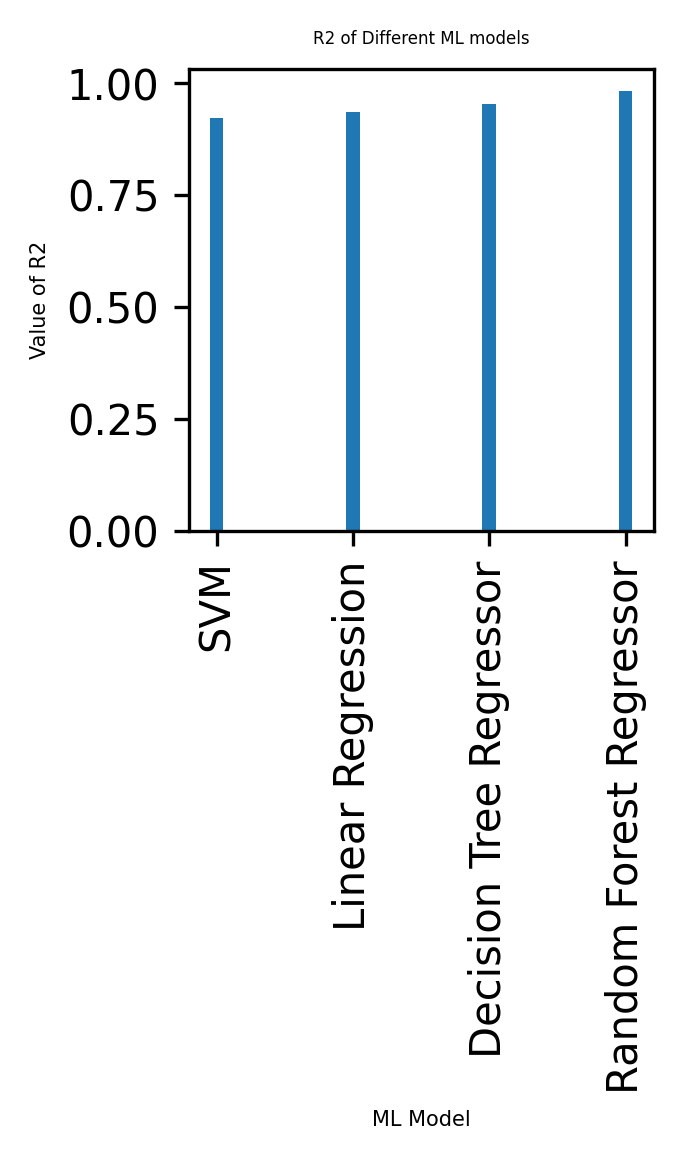

In [65]:
plt.figure(figsize=(2,2),dpi=300)
plt.bar(df1['Model'],df1["R2"], width=.1)
plt.title("R2 of Different ML models",fontsize=4)
plt.xlabel("ML Model",fontsize=5)
plt.ylabel("Value of R2",fontsize=5)
plt.xticks(rotation=90)

# Classification Algorithms

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

*Here we want to  predict "AQI_bucket_calculated" column, which is contain catagorical data.. Therefore we again split the dataset

In [67]:
X2 = df[['SO2_Index', 'NO2_index', 'CO_index', 'PM2_5_index',
       'PM10_index', 'Ozone_index', 'NH3_index']]
Y2 = df['AQI_bucket_calculated']
# Splitting the data into independent and dependent columns for classification 

In [68]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33)
# Splitting the data into training and testing data 

# Logistic Regression

In [69]:
#fit the model on train data 
log_reg = LogisticRegression(max_iter=1000).fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.8985507246376812
Model accuracy on test is:  0.8848758465011287
--------------------------------------------------
KappaScore is:  0.8364023432125763


In [70]:
log_reg.predict([[77,327,55,78,2,100,323]])

array(['Satisfactory'], dtype=object)

In [71]:
log_reg.predict([[100,50,7,181,92,100,2]]) 

array(['Moderate'], dtype=object)

# Hyper Parameter Tuning for Decision Tree Using GridSearch CV

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
def dtree_grid_search(X2,Y2,nfolds):
    #create a dictionary of all values we want to test
    param_grid=[{'criterion':['gini','entropy'],
                'max_features':['auto',None ],
                 'max_depth':[5,6,8,10,11],
                  'min_samples_leaf':[5,6,7,10,11],
                  'min_samples_split':[5,8,9,10,11]}]
    #decision tree model
    dtree_model=DecisionTreeClassifier()
    dtree_gscv= GridSearchCV(dtree_model,param_grid,cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X2,Y2)
    return dtree_gscv.best_params_

In [74]:
get_par= dtree_grid_search(X_train2,Y_train2,5)
get_par

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [75]:
#model training using the hyperparameter
decision_tree=DecisionTreeClassifier(random_state=52,max_depth=5,criterion='entropy',max_features=None,
                                     min_samples_split=10,min_samples_leaf=5)

# Hyper Parameter Tuning for Random Forest Using GridSearch CV

In [76]:
def ran_grid_search(X2,Y2,nfolds):
    #create a dictionary of all values we want to test
    param_grid=[{'criterion':['gini','entropy'],# measures split quality
                 'n_estimators': [10,50,100,250],# number tree to grow
                 'max_depth':[6,8,10,12], # max nodes in each tree
                  'min_samples_leaf':[5,6,7,8], # sample required in each leaf
                  'min_samples_split':[5,8,9,12]}] # sample required to split node
    #decision tree model
    rfor_model=RandomForestClassifier()
    rfor_gscv= GridSearchCV(rfor_model,param_grid,cv=nfolds)
    #fit model to data
    rfor_gscv.fit(X2,Y2)
    return rfor_gscv.best_params_

In [77]:
best_par= ran_grid_search(X_train2,Y_train2,5)
best_par

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 10}

In [78]:
#model training using the hyperparameter
ran_forest=RandomForestClassifier(random_state=52,bootstrap=False,max_features=None,n_estimators=100,max_depth=10,criterion='entropy',min_samples_split=9,min_samples_leaf=5)

# Decision Tree Classifier

In [79]:
# fit the model on train data 
DT2 = decision_tree.fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))


Model accuracy on train is:  0.9821627647714605
Model accuracy on test is:  0.9661399548532731
--------------------------------------------------
KappaScore is:  0.9518833905374289


In [80]:
DT2.predict([[100,50,7,181,92,100,2]]) 

array(['Moderate'], dtype=object)

# Random Forest Classifier

In [81]:
#fit the model on train data 
RF=ran_forest.fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  0.9855072463768116
Model accuracy on test is:  0.963882618510158
--------------------------------------------------
KappaScore is:  0.9487023607914659


In [82]:
RF.predict([[100,50,7,181,92,100,2]]) 

array(['Moderate'], dtype=object)

# K-Nearest Neighbours

In [83]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9587513935340022
Model accuracy on test is:  0.9300225733634312
--------------------------------------------------
KappaScore is:  0.900706399531477


In [84]:
KNN.predict([[100,50,7,181,92,100,2]]) 

array(['Moderate'], dtype=object)

# *A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator like"logistic regressor and random forest etc"

In [85]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
deci_clf=DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()
kner_clf=KNeighborsClassifier()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf),('DecisionTree',deci_clf), ('rf', rnd_clf),('KNeighbors',kner_clf)],
 voting='hard')
voting_clf.fit(X_train2, Y_train2)
predictions=voting_clf.predict( X_test2)
# predictions.sort()
print(predictions)


['Moderate' 'Moderate' 'Satisfactory' 'Good' 'Satisfactory' 'Moderate'
 'Satisfactory' 'Satisfactory' 'Good' 'Satisfactory' 'Satisfactory' 'Good'
 'Good' 'Good' 'Moderate' 'Good' 'Good' 'Good' 'Moderate' 'Good'
 'Satisfactory' 'Satisfactory' 'Good' 'Satisfactory' 'Moderate'
 'Satisfactory' 'Moderate' 'Moderate' 'Good' 'Satisfactory' 'Moderate'
 'Moderate' 'Moderate' 'Good' 'Good' 'Satisfactory' 'Moderate'
 'Satisfactory' 'Satisfactory' 'Moderate' 'Poor' 'Moderate' 'Good'
 'Satisfactory' 'Poor' 'Satisfactory' 'Good' 'Good' 'Good' 'Satisfactory'
 'Satisfactory' 'Satisfactory' 'Satisfactory' 'Satisfactory' 'Moderate'
 'Moderate' 'Moderate' 'Good' 'Satisfactory' 'Satisfactory' 'Satisfactory'
 'Satisfactory' 'Good' 'Good' 'Satisfactory' 'Moderate' 'Moderate'
 'Satisfactory' 'Moderate' 'Good' 'Good' 'Satisfactory' 'Moderate' 'Good'
 'Poor' 'Satisfactory' 'Good' 'Satisfactory' 'Satisfactory' 'Satisfactory'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Good' 'Moderate'
 'Satisfactor

# Here we use 5 fold cross_val_score, to see the average result of all the above  classifier at a place

In [86]:
from sklearn.model_selection import cross_val_score
c=[]
c.append(cross_val_score(log_clf,X_train2, Y_train2,scoring='accuracy',cv=5).mean())
c.append(cross_val_score(deci_clf,X_train2, Y_train2,scoring='accuracy',cv=5).mean())
c.append(cross_val_score(rnd_clf,X_train2, Y_train2,scoring='accuracy',cv=5).mean())
c.append(cross_val_score(kner_clf,X_train2, Y_train2,scoring='accuracy',cv=5).mean())
print(c)
dicc={"log_reg":c[0],"dec_cl":c[1],"Random_frst":c[2],"K_nn":c[3]}

[0.6844816883923028, 0.9832960893854749, 0.963221601489758, 0.9219801365611422]


In [87]:
dicc

{'log_reg': 0.6844816883923028,
 'dec_cl': 0.9832960893854749,
 'Random_frst': 0.963221601489758,
 'K_nn': 0.9219801365611422}

In [88]:
c=pd.DataFrame(c)


In [89]:
# setting Model column and giving name of each model
md=["Logistic classifier",'Decision classifier','Random forest','KNN']
md=pd.DataFrame(md)
c=[md,c]
c=c=pd.concat(c,axis=1)
# c.rename(index={0:"Logistic classifier",1:'Decision classifier',2:'Random forest',3:'KNN'})

In [90]:
c.columns = ['Model', "Kappa score"]
c=pd.DataFrame(c)

In [92]:
# to save csv file of c 
c.to_csv('classifier.csv')

([0, 1, 2, 3],
 [Text(0, 0, 'Logistic classifier'),
  Text(1, 0, 'Decision classifier'),
  Text(2, 0, 'Random forest'),
  Text(3, 0, 'KNN')])

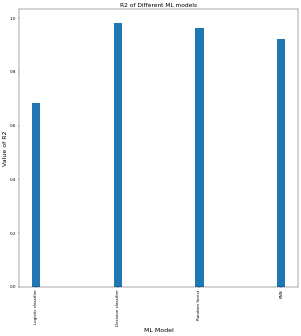

In [91]:
plt.figure(figsize=(12,12),dpi=30)
plt.bar(c['Model'],c["Kappa score"], width=.1)
plt.title("R2 of Different ML models",fontsize=14)
plt.xlabel("ML Model",fontsize=15)
plt.ylabel("Value of R2",fontsize=15)
plt.xticks(rotation=90)

# We see that the desicion tree classifier is best model in our given data 

In [1]:
pip install sweetviz


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     - -------------------------------------- 0.4/15.1 MB 12.2 MB/s eta 0:00:02
     ----- ---------------------------------- 2.0/15.1 MB 24.9 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.1 MB 28.5 MB/s eta 0:00:01
     --------- ------------------------------ 3.7/15.1 MB 7.2 MB/s eta 0:00:02
     ------------- -------------------------- 5.

In [23]:
import sweetviz as sv



In [24]:
my_report = sv.analyze(df)
my_report.show_html()

C:\Users\sourav\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\sourav\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\sourav\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\sourav\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\sourav\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\sourav\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_nume

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
